If you have never used google colab before check out this documentation: https://colab.research.google.com/notebooks/intro.ipynb

# Task 0: Import necessary modules
First, we will import the libraries needed to run the practical. In python, several toolboxes are regularly used: scipy (for maths), matplotlib (for plotting) and numpy (for arrays).
All the code written in this script can be loaded using the play button on the left of the coding block.

You will need to download the following data file and save it to your google drive

[mill.mat](https://github.com/predictive-clinical-neuroscience/BigDataCourse/blob/main/data/mill.mat)

In [2]:
# basic modules
import os
import sys
import numpy as np
import scipy.io as sio
import scipy.linalg as la
import matplotlib.pyplot as plt

# Task 1: Load data

We are going to perform a dimensionality reduction technique called principal component analysis (PCA). Let's perform PCA on some interesting data. Download the mill image from brightspace and upload it on the left hand side under files. Show it using the imshow() function:

First, we need to get the data

### Option 1: Download to your Google drive

In [ ]:
# needed for you to be able to save the necessary data to your google drive
from google.colab import drive
drive.mount('/content/drive')

# change dir to data on your google drive
# change BMS85/data to where you saved mill.mat 
os.chdir('drive/My Drive/BMS85/data/') #Change 

### Option 2: Download directly from GitHub

In [3]:
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/mill.mat

zsh:1: command not found: wget


Now, we can actually do the work... 

In [ ]:
matstruct_contents = sio.loadmat('mill.mat')
img = matstruct_contents['img']
plt.figure()
plt.imshow(img)
plt.title('original')

# Task 2: Perform PCA
PCA is performed by an eigendecomposition of the covariance matrix. Putting the mathematics aside; first, we subtract the mean from our image. Then we calculate the covariance using the cov() function and find the eigenvalues and eigenvectors using the eig() function. For more details of each function look at the numpy documentation (https://numpy.org/doc/stable/reference/routines.linalg.html).

In [ ]:
x = img
m = np.mean(x,0)
x = x - np.tile(m,[np.size(x,0),1])
covmat = np.cov(x.T)
[evals, evecs] = la.eig(covmat)

Now we compute the total percentage of variance explained by eigenvectors 1, 1:2, 1:3, ..., 1:n. Then plot the results against the number of eigenvectors that contributed to the total variance explained:

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


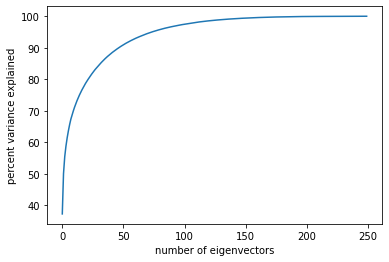

In [ ]:
pve = np.cumsum(evals)/np.sum(evals)*100
plt.figure()
plt.plot(range(0,np.size(evals)),pve)
plt.xlabel('number of eigenvectors');
plt.ylabel('percent variance explained');

Create a vector ‘keep’ that indicates which of the top eigenvectors to keep if we wish to explain at least 90% of the total variance:

In [ ]:
keep = pve<90


How many eigenvectors do we need to explain at least 90% of the variance?

In [ ]:
n = sum(keep)
print(n)

47


Overwrite ‘evecs’ so that it contains only the eigenvectors indicated by ‘keep’ (this is the reduced PCA space):

In [ ]:
evecs = evecs[:,keep]

Compute the scores of x in the reduced PCA space by pre-multiplying the eigenvectors in evecs by x:

In [ ]:
scores = np.dot(x, evecs)

# Task 3: Dimensionality reduction
Now we can reconstruct the image using the scores by post-multiplying them by the transpose of evecs and then adding the mean back again:


Text(0.5, 1.0, 'compressed')

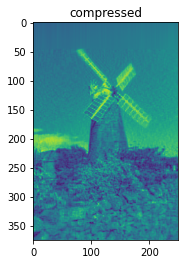

In [ ]:
y = np.dot(scores, evecs.T)
y = y + np.tile(m,[np.size(y,0),1])

plt.figure()
plt.imshow(y)
plt.title('compressed')

As you can see we can reconstruct the original image pretty well using only a subset of the eigenvectors. This means that instead of needing all of the information in ‘img’ we can just store the information in ‘evecs’ and ‘scores’. Let’s see how much storage space this saves us and then compute the compression ratio:

In [ ]:
kb_img = sys.getsizeof(x)/1000
print(['original image: ' + np.str(kb_img) + ' kb'])
kb_y = (sys.getsizeof(scores) + sys.getsizeof(evecs))/1000
print(['compressed image: ' + np.str(kb_y) + ' kb']);
compr_pct = (1 - kb_y / kb_img) * 100
print(['compression ratio: ' + np.str(compr_pct) + ' %'])

['original image: 750.112 kb']
['compressed image: 141.224 kb']
['compression ratio: 81.1729448402372 %']
